In [7]:
#importing dependencies for data wrangling
import pandas as pd
import numpy as np

In [65]:
# importing modules for data visualization
import matplotlib.pyplot as plt
from mglearn.plot_helpers import  cm2

In [90]:
# importing machine learning modules
from sklearn.datasets import make_blobs
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, learning_curve, KFold

In [85]:
from sklearn.datasets import load_breast_cancer
from mglearn.datasets import load_extended_boston

### Creating a synthetic dataset using sklearn for Regression

##### This function will generate synthetic data for us to use further down the line for building our regression model. We will use a scatterplot for visualization

In [5]:
def make_wave(n_samples=100):
    # generating the data 
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4*x)+x)
    y = (y_no_noise + rnd.normal(size=len(x)))/2

    return x.reshape(-1,1), y

In [12]:
X, y = make_wave(60)

##### Analysis and visualization

In [13]:
df_x = pd.DataFrame(X)
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       60 non-null     float64
dtypes: float64(1)
memory usage: 612.0 bytes


In [14]:
df_y = pd.DataFrame(y)
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       60 non-null     float64
dtypes: float64(1)
memory usage: 612.0 bytes


###### we observe there are two variable for a feature and target valuse

X.shape: (60, 1)


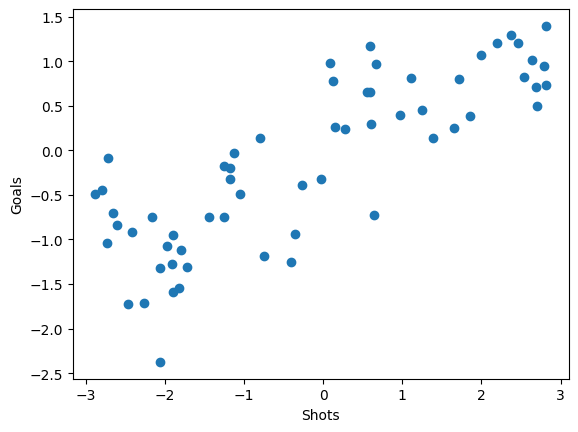

In [15]:
plt.plot(X, y, 'o')
plt.xlabel("Shots")
plt.ylabel("Goals")
print("X.shape: {}". format(X.shape))

###### From the visualiztion we can observe the points follow a specific pattern we can be sure that as as the number of the shots increases the goals will also increase

### Applying the linear regression algorithm 

In [35]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [36]:
# Initializing the model to 3 neighbors
lr = LinearRegression()

In [37]:
#Fitting the model with data
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
# Making predictions
print("Test set predictions: {}". format(lr.predict(X_test)))

Test set predictions: [-0.81274146  0.79990117 -0.47984962  0.22771528  1.22778333  0.59749174
  1.21645044 -1.2219042  -1.01841511 -0.5677658  -0.92839354 -1.28718838
  0.26779873 -0.02988867  1.17208529]


In [48]:
# Calculating accuracy
print("Test set R^2: {:.2f}".format(lr.score(X_test, y_test)))
print("Training set R^2: {:.2f}".format(ridge.score(X_train, y_train)))

Test set R^2: 0.69
Training set R^2: 0.66


###### We can observe that the r squared value of the model is 0.69

### Visualizing the predictions

In [29]:
def plot_knn_regression(n=1):
    line = np.linspace(-3, 3, 100).reshape(-1, 1)
    # print("w[0]: %f b: %f" % (lr.coef_, lr.intercept_))

    plt.figure(figsize=(8,8))
    plt.plot(line, lr.predict(line))
    plt.plot(X, y, 'o', c=cm2(0))
    ax = plt.gca()
    
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    
    ax.set_ylim(-3, 3)
    ax.legend(["model", "training data"], loc="best")
    ax.grid(True)
    ax.set_aspect('equal')

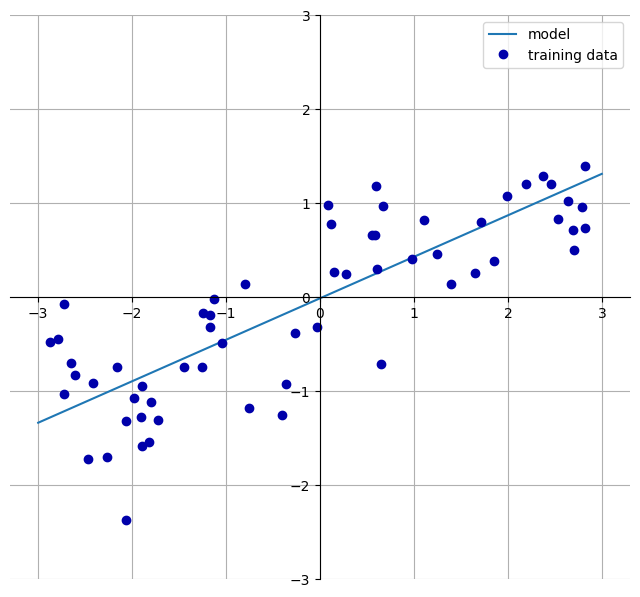

In [30]:
plot_knn_regression()

- ##### From the above graph we observe that the line of regresion cuts through the datapoint in order to maintain a least square 

### Ridge Regression 

-  ##### Ridge regression is similar to linear regression 
-  ##### The only difference is that the weight are calculated by generalization
-  ##### This means that bringing most values to as close as possible to zero so that they don't affect the model significantly
-  ##### Ridge regression uses L2 regularization

#### Applying the ridge regression algorithm 

In [133]:
X, y = load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=66)

In [134]:
# Initializing the model to 3 neighbors
ridge = Ridge()

In [135]:
#Fitting the model with data
ridge.fit(X_train, y_train)

Ridge()

In [136]:
# Making predictions
print("Test set predictions: {}". format(ridge.predict(X_test)))

Test set predictions: [15.83218127 38.56989447 29.01087338 49.74429623 18.87693888 17.64122916
 23.0448531  21.93857344 42.20907777 15.96600329 23.13162656 13.39422295
 32.06176411 25.53183599 14.4452839  22.86564828 15.64307831 15.31016632
  6.47909539 12.03108496 18.68273431 19.79915628 24.0857054  39.31360014
 17.12388096 29.05621909 20.66954274 21.85239983 14.62301405 27.65031669
 27.56167347 32.65503879 39.51444555 15.19831386 25.40884043 23.89509883
 25.39329242 27.14752361 18.04145381 18.34642072 28.44421295 21.42187343
 19.45665818 41.26640079 26.56844852 16.77942813 25.65123139 12.50239274
 20.41567587 20.86670607 32.39328333 15.36482681 39.28636377 26.71548801
 11.64770405 18.85360706 27.79298525 17.90263998 21.7719965  22.03004242
 17.98046122 19.18363492 10.42761475 21.66569362 18.4111159   8.91790275
 17.74860844 22.97426536 24.64879105 17.78702966  6.7807014  21.74766695
 22.40810646 15.08016208 22.6258063  30.19911232 34.2188226   9.0583407
 18.75106098  6.53822725 32.89

In [137]:
# Calculating accuracy
print("Test set R^2: {:.2f}".format(ridge.score(X_test, y_test)))
print("Training set R^2: {:.2f}".format(ridge.score(X_train, y_train)))

Test set R^2: 0.91
Training set R^2: 0.84


-  ##### The training set score of the ridge is less than linear regression while the test score is higher
-  ##### That means the model generalises better on new data
-  ##### This is the type of behaviour we want for our model 

#### Visualizing the ridge regression algorithm 

In [138]:
# Initializing the model to 3 neighbors
lr = LinearRegression()

In [139]:
#Fitting the model with data
lr.fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(lr.score(X_test, y_test)))
print("Training set R^2: {:.2f}".format(lr.score(X_train, y_train)))

Test set R^2: 0.85
Training set R^2: 0.93


In [140]:
# Initializing the model to 3 neighbors
ridge = Ridge().fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(ridge.score(X_test, y_test)))
print("Training set R^2: {:.2f}".format(ridge.score(X_train, y_train)))

Test set R^2: 0.91
Training set R^2: 0.84


In [141]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(ridge10.score(X_test, y_test)))
print("Training set R^2: {:.2f}".format(ridge10.score(X_train, y_train)))

Test set R^2: 0.82
Training set R^2: 0.74


-  ##### Increaing the alpha forces coefficients towards zero, this decreases training set score but helps with generalization

In [142]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(ridge01.score(X_test, y_test)))
print("Training set R^2: {:.2f}".format(ridge01.score(X_train, y_train)))

Test set R^2: 0.91
Training set R^2: 0.90


- ##### Decreasing the alpha allows the coefficients to be less restricted
- ##### An even lower alpha will lead us to linear regression

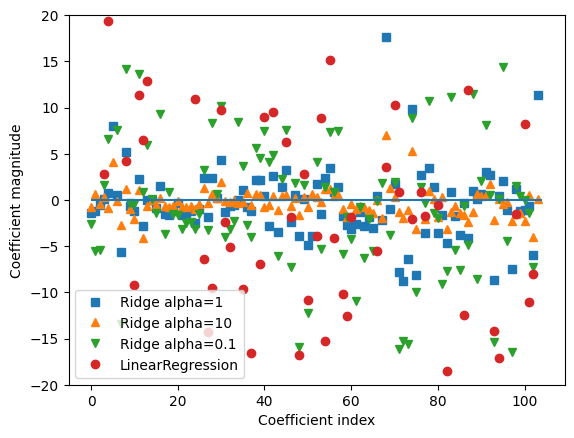

In [144]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-20, 20)
plt.legend()

- ##### For alpha=10 the coefficient are very much restricted and are constraint arount the -0.2 to 0.2 region
- ##### For alpha=1 we see the coefficients open up and start having a bigger range and start moving to the range of -0.3 to 0.3
- ##### For alpha=0.1 we see a significant increase in the magnitude of the coefficients they start exibiting a pattern that resembles linear regression

#### Visualizing the ridge regression algorithm at varying data sample sizes

In [145]:
def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(est, X, y, train_sizes=np.linspace(.1, 1, 20), cv=KFold(20, shuffle=True, random_state=1))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--',
                   label="training "+estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-',
                   label="test "+estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.ylabel('Score (R^2)')
    plt.ylim(0, 1.1)
def plot_ridge_n_samples():
    X, y = load_extended_boston()

    plot_learning_curve(Ridge(alpha=1), X, y)
    plot_learning_curve(LinearRegression(), X, y)
    plt.legend(loc=(0, 1.05), ncol=2, fontsize=11)

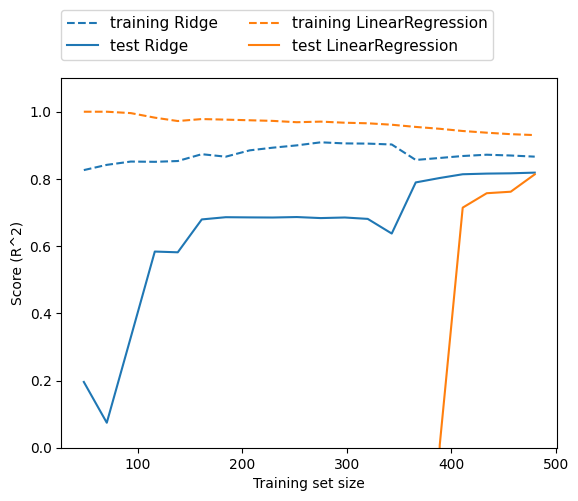

In [146]:
plot_ridge_n_samples()

- ##### the training score is higher than the test score for all dataset sizes
- ##### The training score of ridge is lower than the training score for linear regression because it is more genralized 
- ##### For less than 400 data points, linear regression is not able to learn anything
- ##### As more and more data becomes available, both models improve and linear regression catches up with ridge regression 

### Lasso

-  ##### Lasso an alternative for regularizing linear regression  
-  ##### The weights/coefficients are calculated by L1 generalization
-  ##### This means that bringing most values that are  as close as possible to zero are changed to zero so that they don't affect the model significantly

#### Applying the Lasso algorithm 

In [147]:
# Initializing the model to 3 neighbors
lasso = Lasso()

In [148]:
#Fitting the model with data
lasso.fit(X_train, y_train)

Lasso()

In [149]:
# Making predictions
print("Test set predictions: {}". format(lasso.predict(X_test)))

Test set predictions: [20.06033141 24.88417052 24.63279968 24.65301751 23.35716171 21.43168914
 22.80585847 22.16561306 24.86475573 22.48648555 23.61693258 20.13824159
 24.55928899 24.35178202 20.68494732 22.05248867 21.32728954 20.50700878
 18.76591167 20.32077342 23.15276353 22.49380007 23.37735288 23.13774668
 21.65696079 23.70046441 21.69282412 21.42504731 21.87394239 24.69561923
 24.37865624 24.06039597 24.6263752  19.32050039 23.98763074 23.31386918
 23.8265457  24.62570274 22.4063724  22.29072487 24.21013585 23.07691067
 20.84945767 24.83705856 23.93558092 22.47241695 24.4668591  19.899442
 23.88202987 23.05632874 24.96349899 22.39900148 24.99973672 24.37832232
 20.34616066 21.85850229 24.61323138 22.4784177  23.97690392 23.12569797
 23.17415079 22.75286984 19.71795501 24.36293638 22.67817273 17.30964019
 23.50836739 23.50117215 24.49145788 23.27794822 17.88233322 22.07805071
 23.97690441 20.86218235 23.53951868 24.64711852 24.6814969  18.52488771
 23.10881927 19.95921682 24.173

In [150]:
# Calculating accuracy
print("Test set R^2: {:.2f}".format(lasso.score(X_test, y_test)))
print("Training set R^2: {:.2f}".format(lasso.score(X_train, y_train)))
print("Number of features used: {}".format(np.sum(lasso.coef_!=0)))
print("Number of features not used: {}".format(np.sum(lasso.coef_==0)))

Test set R^2: 0.24
Training set R^2: 0.25
Number of features used: 3
Number of features not used: 101


-  ##### The Lasso does quite badly on the training and test set
-  ##### only 3 of the 104 features is used, this is an example of an underfitted model
-  ##### to reduce underfitting lets decrease the alpha

#### Visualizing the lasso algorithm 

In [151]:
# Initializing the model to 3 neighbors
lr = LinearRegression()

In [152]:
#Fitting the model with data
lr.fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(lr.score(X_test, y_test)))
print("Training set R^2: {:.2f}".format(lr.score(X_train, y_train)))

Test set R^2: 0.85
Training set R^2: 0.93


In [153]:
# Initializing the model to 3 neighbors
lasso = Lasso().fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(lasso.score(X_test, y_test)))
print("Training set R^2: {:.2f}".format(lasso.score(X_train, y_train)))

Test set R^2: 0.24
Training set R^2: 0.25


In [154]:
lasso001 = Lasso(alpha=0.01, max_iter=10000).fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Training set R^2: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Number of features used: {}".format(np.sum(lasso001.coef_!=0)))
print("Number of features not used: {}".format(np.sum(lasso001.coef_==0)))

Test set R^2: 0.91
Training set R^2: 0.86
Number of features used: 34
Number of features not used: 70


-  ##### decreasing the alpha lessens the restriction on the coefficients
-  ##### this allows us to fit a more complex model with more features
-  ##### which increases the training and test scores

In [159]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Training set R^2: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_!=0)))
print("Number of features not used: {}".format(np.sum(lasso00001.coef_==0)))

Test set R^2: 0.88
Training set R^2: 0.93
Number of features used: 93
Number of features not used: 11


- ##### Decreasing the alpha even more allows us to use almost all the features
- ##### This then increases accuraccy but can also lead to overfitting

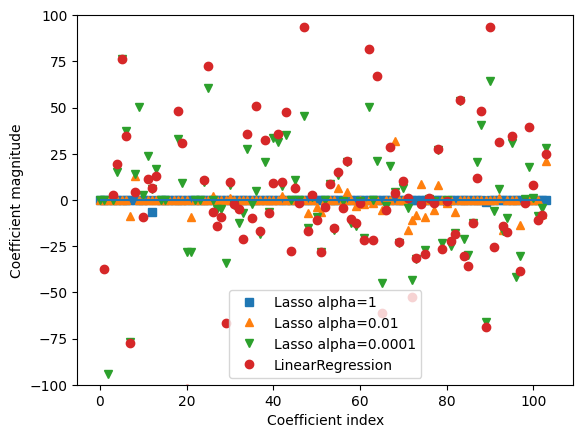

In [163]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-100, 100)
plt.legend()

- ##### For alpha=1 the coefficient are very much restricted 
- ##### For alpha=0.01 we see the coefficients open up and start having a bigger
- ##### For alpha=0.0001 we see a significant increase in the magnitude of the coefficients they start exibiting a pattern that resembles linear regression

#### Visualizing the ridge regression algorithm at varying data sample sizes

In [164]:
def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(est, X, y, train_sizes=np.linspace(.1, 1, 20), cv=KFold(2, shuffle=True, random_state=1))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--',
                   label="training "+estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-',
                   label="test "+estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.ylabel('Score (R^2)')
    plt.ylim(0, 1.1)
def plot_lasso_n_samples():
    X, y = load_extended_boston()

    plot_learning_curve(Lasso(alpha=0.0001, max_iter=1000000), X, y)
    plot_learning_curve(LinearRegression(), X, y)
    plt.legend(loc=(0, 1.05), ncol=2, fontsize=11)

In [ ]:
plot_lasso_n_samples()

C:\Users\mbali\miniconda3\envs\cyberdyne\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.022e-01, tolerance: 8.082e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mbali\miniconda3\envs\cyberdyne\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.631e+00, tolerance: 1.432e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\mbali\miniconda3\envs\cyberdyne\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

- ##### the training score is higher than the test score for all dataset sizes
- ##### The training score of ridge is lower than the training score for linear regression because it is more genralized 
- ##### For less than 400 data points, linear regression is not able to learn anything
- ##### As more and more data becomes available, both models improve
